<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/ML_exam_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

Xgrid, x1line, x2line = gen_sample_grid(npx=200, npy=200, limit=1)

# np.reshape(num rows, num columns)
# np.concatenate((a1, a2), axis)    axis=0 (along rows), axis =-1 (last axis, in 2d this is across)
# emptyarray = np.append(emptyarray, new_value)

In [27]:
# COVARIANCE
# covariance from Training Dataset

# Given equations
# covariance matrix function from angles
def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rotangdeg), -np.sin(rotangdeg)], [np.sin(rotangdeg), np.cos(rotangdeg)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.T)
    return covar

# X needs to be in this format:
# column indicates parameter
X = np.array([[2,3],    # 1st sample
              [2,2],    # 2nd sample
              [1,1]])   # 3rd sample, etc.

def get_cov_data(X):
  mean = np.mean(X, axis=0)
  A = X - mean
  C = np.matmul(A.T, A)  # get Covariance matrix
  return C

C = get_cov_data(X)
print(C)

[[0.66666667 1.        ]
 [1.         2.        ]]


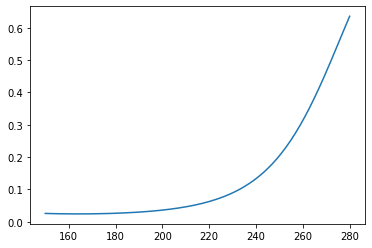

Posterior of breaking at 240: 0.13311052107637888


In [35]:
# BAYES & MAXIMUM LIKELIHOOD

# define a function to generate the Gaussian shape (normal distribution)
def Gaussian(x, mu, sig):
  out = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sig)**2)
  return out

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/womue/s1.csv")
x = np.array(df['x'])
y = np.array(df['y'])
X = np.arange(150,281,1)

#Continue here...
nb_mean = np.mean(x[y==0])
nb_std = np.std(x[y==0])
nb_likelihood = Gaussian(X, nb_mean, nb_std)
nb_prior = 0.9
b_mean = np.mean(x[y==1])
b_std = np.std(x[y==1])
b_likelihood = Gaussian(X, b_mean, b_std)
b_prior = 0.1

p_x = (b_likelihood*b_prior) + (nb_likelihood*nb_prior)
b_posterior = (b_likelihood*b_prior)/p_x
plt.plot(X, b_posterior)
plt.show()
print("Posterior of breaking at 240:",b_posterior[X==240][0])

In [ ]:
# ERROR METRICS

def l1_error(grid, point):
  abs = np.abs(grid - point)
  out = np.sum(abs, -1)
  return out


def linf_error(grid, point):
  abs = np.abs(grid - point)
  out = np.amax(abs, -1)
  return out

def lp_error(grid, point, p):
  abs = np.abs(grid - point)**p
  out = np.sum(abs, -1)**(1/p)
  return out


In [ ]:
# REGRESSION
# Linear Regression
fig, ax = plt.subplots()

df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')
x = np.array(df['Distance (mm)'][:])
y = np.array(df['Total absorption'][:])

# n.b. len(x) = 1000
A = np.array([[np.sum(x), np.sum(x**2)],
              [len(x), np.sum(x)]])

b = np.array([[np.dot(x,y)],[np.sum(y)]])

beta = np.linalg.solve(A, b)
b1 = beta[0][0]   # the y intercept
b2 = beta[1][0]   # the gradient

xval = np.linspace(0,6, 200)
linRegression = b1 + b2*xval
plt.plot(xval,linRegression, color="black")
ax.scatter(x,y,color="blue")
plt.show()

# Higher order regression
fig, ax = plt.subplots()

# n.b. len(x) = 1000
A = np.array([[np.sum(x**2), np.sum(x**3), np.sum(x**4)],
              [np.sum(x), np.sum(x**2), np.sum(x**3)],
              [len(x), np.sum(x), np.sum(x**2)]])

b = np.array([[np.dot(x**2,y)], [np.dot(x,y)], [np.sum(y)]])

beta = np.linalg.solve(A, b)
b1 = beta[0][0]   # the y intercept
b2 = beta[1][0]   # x coefficient
b3 = beta[2][0]   # x^2 coefficient
xval = np.linspace(0,6, 200)
higherRegression = b1 + b2*xval + (b3*(xval**2))
plt.plot(xval,linRegression, color="black")
plt.plot(xval, higherRegression, color="red")
ax.scatter(x,y,color="blue")
plt.show()

# Ridge Regularisation
# new A matrix 
A_reg = np.array([[np.sum(x),      2*lam + np.sum(x**2)],
                  [2*lam + len(x), np.sum(x)]])

In [42]:
# GRADIENT DESCENT
# Analytical error derivatives (2 params)

# Alternating Descent



2


In [ ]:
# LINEAR DISCRIMINANT FUNCTIONS

# generalised (g = a^t y)
# e.g. g(x) = -1 + x1 + 2*x2
# a = (-1, 1, 2)^t
# y = (1, x1, x2)^t [n.b. the 1 at the start, needs to be added to Xgrid]

# for multiple discriminant functions for classification of multiple classes
a1 = np.array([[1.3, -1, -3]])
a2 = np.array([[-2, 1, 2]])
a3 = np.array([[0.3, 0.1, -0.1]])
a4 = np.array([[0, -1, 1]])
a5 = np.array([[-0.2, 1.5, -1]])


#Ygrid is defined as the same as Xgrid, except it has 1 
#at the beginning - this therefore adds a column of ones to the left
Ygrid = np.concatenate([np.ones([npx * npy,1]), Xgrid],axis=1) 

#adding nonlinearity in the form of x1*x2
# new format y = (1, x1, x2, x1*x2)^t
Ygrid = np.concatenate([np.ones([npx * npy,1]), Xgrid, np.array([Xgrid[:,0]*Xgrid[:,1]]).T],axis=1) 


#calculate each of the five functions as before
g1 = np.matmul(a1, Ygrid.T) 
g2 = np.matmul(a2, Ygrid.T) 
g3 = np.matmul(a3, Ygrid.T) 
g4 = np.matmul(a4, Ygrid.T) 
g5 = np.matmul(a5, Ygrid.T)

#combine all five functions together
gconc = np.concatenate([g1, g2, g3, g4, g5])

#find where the maximum value lies
omega=np.argmax(gconc,axis=0)

#result = numpy.where(arr == numpy.amax(arr))
#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy]) 

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, omega)


[[-2]
 [-2]]
w0:  [[-2.]]
[[-2 -2]]


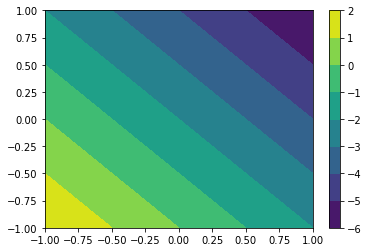

In [61]:
# SVM
# find decision boundary from two support vectors
sv1 = np.array([2, 1]).reshape(-1, 1)
sv2 = np.array([0,-1]).reshape(-1, 1)

def find_g(sv1, sv2, grid):
  w = sv2-sv1
  print(w)
  xm = (sv1+sv2)/2    # point on db where g(x)=0 is the midpoint between SVs
  w0 = np.matmul(w.T, xm)
  print("w0: ", w0)
  print(w.T)
  g = np.matmul(w.T, grid.T) + w0
  return g
plt.contourf(x1line, x2line, find_g(sv1, sv2, Xgrid).reshape(200,200))
plt.colorbar()
plt.show()

In [ ]:
# PARZEN WINDOWS
def tophat(u):
  out = np.array([])
  for i in range(0,len(u)):
    if np.abs(u[i])<0.5:
      out = np.append(out, 1)
    else:
      out = np.append(out, 0)
  return out

d = np.array([-0.6, 1.1])
h = 2   # define bandwidth
m = len(d)
x = np.linspace(-2.5, 2.5, 200)
k1 = tophat((x-d[0])/h)
k2 = tophat((x-d[1])/h)
plt.plot(x, (k1+k2)/(h*m))
plt.show()

In [32]:
# PCA

def PC_fromC(cov):
  # GET PCs
  w, v = np.linalg.eig(cov)
  idx = np.argsort(w)
  w = w[idx]
  v = v[:,idx]
  print("Eigenvalues (Variance): ", w)
  print("Eigenvectors (PCs): ", v)
  return

PC_fromC(C)



Eigenvalues (Variance):  [0.13148291 2.53518376]
Eigenvectors (PCs):  [[-0.8816746  -0.47185793]
 [ 0.47185793 -0.8816746 ]]


In [43]:
# SCALING

df = pandas.read_csv('http://pogo.software/me4ml/tensile_strength.csv')
t = np.array(df['Temperature (deg C)'][:])
s = np.array(df['Ultimate tensile strength (Pa)'][:])
t_mean = np.mean(t)
s_mean = np.mean(s)
t_std = np.std(t)
s_std = np.std(s)

t_scale = (t-t_mean)/t_std
s_scale = (s-s_mean)/s_std

scArray = np.array([[t_mean, s_mean],
                    [t_std,   s_std]])

X_unscaled = np.concatenate((t.reshape(-1,1), s.reshape(-1,1)), axis=1)
X_scaled = (X_unscaled-scArray[0,:])/scArray[1,:]
print(X_unscaled)
print(X_scaled)


[[1.84122816e+02 1.97078430e+08]
 [1.77837350e+02 2.20637860e+08]
 [1.92457401e+02 1.93973260e+08]
 [1.93875471e+02 2.21497347e+08]
 [1.98058288e+02 2.53096566e+08]
 [1.89300558e+02 2.45678693e+08]
 [1.93487412e+02 2.27168868e+08]
 [1.94463978e+02 2.36684103e+08]
 [1.90151401e+02 2.05177628e+08]
 [2.03301305e+02 2.40607969e+08]
 [2.14824143e+02 3.26589694e+08]
 [1.98425689e+02 2.24066914e+08]
 [1.92596565e+02 1.81907361e+08]
 [2.00894916e+02 2.48627244e+08]
 [1.78785261e+02 2.04016624e+08]
 [1.96336584e+02 2.45351577e+08]
 [2.19760130e+02 2.76633572e+08]
 [2.01575190e+02 2.60437364e+08]
 [1.82819825e+02 2.13091280e+08]
 [2.04904496e+02 2.61619805e+08]
 [2.17256683e+02 2.81456589e+08]
 [1.99893860e+02 3.01188106e+08]
 [2.06719981e+02 2.65289565e+08]
 [2.04253350e+02 2.87583861e+08]
 [2.13511379e+02 2.98416935e+08]
 [2.04156880e+02 2.76863997e+08]
 [2.11640186e+02 2.65324154e+08]
 [1.97378218e+02 2.50845467e+08]
 [1.97500457e+02 2.48004483e+08]
 [2.07156723e+02 2.69029663e+08]
 [2.074216